### NLP with Scikit-Learn: SMS Spam Dataset

In [1]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# SMS Spam Dataset

!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip >> smsspamcollection.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198k    0  198k    0     0  70732      0 --:--:--  0:00:02 --:--:-- 70728


In [ ]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
warning [smsspamcollection.zip]:  203415 extra bytes at beginning or within zipfile
  (attempting to process anyway)
replace SMSSpamCollection? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

In [ ]:
!head SMSSpamCollection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SMSSpamCollection', sep="\t", names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Exploratory Data Analysis

In [4]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

<Axes: xlabel='label', ylabel='count'>

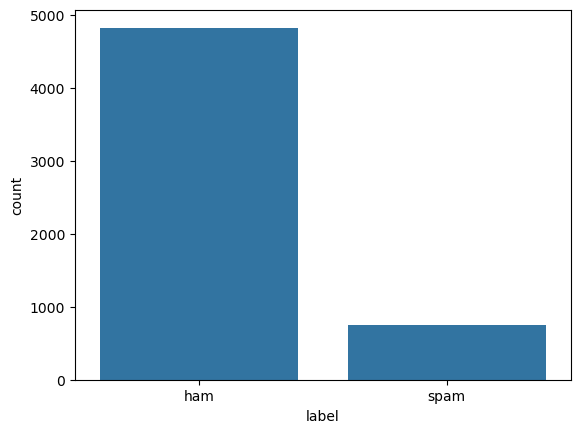

In [6]:
sns.countplot(data=df, x='label')

### Feature Engineering

In [7]:
len(df['text'][0])

111

In [8]:
df['length'] = df['text'].apply(len)

In [9]:
df

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


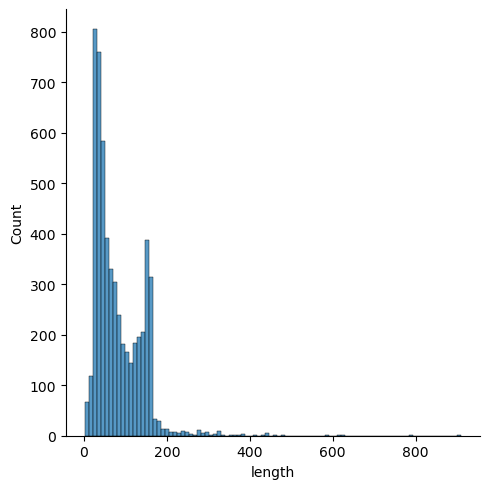

In [10]:
sns.displot(data=df, x="length")

In [11]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
df[df['length'] == 910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

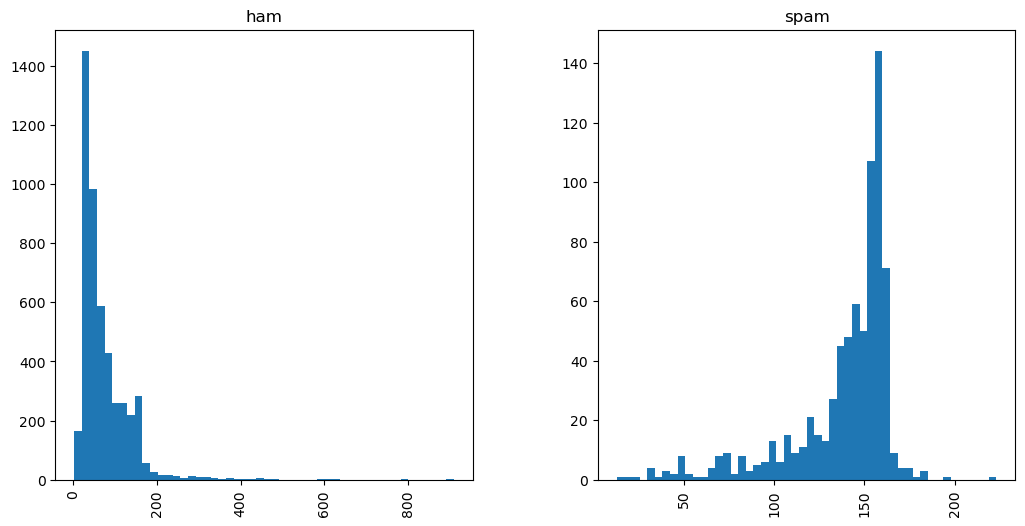

In [13]:
df.hist(column='length', by='label', bins=50, figsize=(12,6))

### Text Pre-processing

In [14]:
from nltk.corpus import stopwords
import string

In [15]:
len(stopwords.words('english'))

198

In [16]:
stopwords.words('english')[1:10]

['about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
# DRY (Dont Repeat Yourself) ; 2+ make a function

def text_processing(text):
    # Remove punctuation
    remove_punc = [c for c in text if c not in string.punctuation]

    # Join punc together
    remove_punc = ''.join(remove_punc)

    # Remove stop words
    return [w for w in remove_punc.split() if w.lower() not in stopwords.words('english')]

In [19]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['text'].apply(text_processing)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: text, Length: 5572, dtype: object

### Vectorization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv_transformer = CountVectorizer(analyzer = text_processing).fit(df['text'])

In [23]:
cv_transformer

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,<function tex...x7d5e78afb9a0>


In [24]:
len(cv_transformer.vocabulary_)

11425

In [25]:
text_0 = df['text'][0]
text_0

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [26]:
bow_0 = cv_transformer.transform([text_0])
bow_0

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (1, 11425)>

In [28]:
print(bow_0)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1


In [29]:
print(bow_0.shape)

(1, 11425)


In [31]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [32]:
text_2 = df['text'][2]

In [33]:
text_2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [34]:
bow_2 = cv_transformer.transform([text_2])
bow_2

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 21 stored elements and shape (1, 11425)>

In [35]:
print(bow_2)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 21 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1


In [36]:
print(bow_2.shape)

(1, 11425)


In [40]:
cv_transformer.get_feature_names_out()[6331]

'entry'

In [41]:
text_messages_bow = cv_transformer.transform(df['text'])

In [42]:
print(f"Shape of the Sparse Matrix: {text_messages_bow.shape}")
print(f"Amount of Non-Zero Occurances: {text_messages_bow.nnz}")

Shape of the Sparse Matrix: (5572, 11425)
Amount of Non-Zero Occurances: 50548


In [44]:
sparcity = text_messages_bow.nnz / (text_messages_bow.shape[0] * text_messages_bow.shape[1]) * 100

In [45]:
print(f"Sparcity: {sparcity}")

Sparcity: 0.07940295412668218


### TF-IDF

#### Example

- Have 100 words
- bank mentioned 5 times
- Term Frequency (TF): 5/100 = 0.05
- Assume 1 million documents, word bank appears 1000 times
- Inverse Document Frequency (IDF): log(1,000,000 / 1000) $\approx$ 7
- TF-IDF = TF * IDF = 0.35

In [47]:
np.log(1000000 / 1000) * 0.05

np.float64(0.34538776394910686)

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
tfidf_transformer = TfidfTransformer().fit(text_messages_bow)

In [52]:
tfidf_2 = tfidf_transformer.transform(bow_2)

In [53]:
print(tfidf_2)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 73)	0.22538631044314436
  (0, 423)	0.09639170919810956
  (0, 430)	0.2177823443125605
  (0, 443)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 1551)	0.2177823443125605
  (0, 1833)	0.4507726208862887
  (0, 1941)	0.1526581729225716
  (0, 2804)	0.17524194104333074
  (0, 3953)	0.1544015632869991
  (0, 4731)	0.16452475271486866
  (0, 5619)	0.1887440015250524
  (0, 6331)	0.347904654589528
  (0, 6557)	0.18466951562322612
  (0, 9159)	0.22538631044314436
  (0, 9200)	0.22538631044314436
  (0, 9252)	0.16121646071144807
  (0, 10512)	0.2118842499614227
  (0, 10686)	0.13995540820792943
  (0, 11084)	0.15898145347176754
  (0, 11123)	0.19104387220509106


In [56]:
cv_transformer.get_feature_names_out()[9200]

'rateTCs'

In [59]:
print(tfidf_transformer.idf_[cv_transformer.vocabulary_['think']])

4.863514852771781


In [60]:
text_tfidf = tfidf_transformer.transform(text_messages_bow)

In [61]:
text_tfidf.shape

(5572, 11425)